# Exploratory data analysis

**confirm working directory**

In [41]:
import os
current_working_directory = os.getcwd()
print(current_working_directory)

/Users/andrewruiz/HPAM9000_ruiz/Python


## Calculate minimum infection rate (MIR)

MIR is a measure of the amount of virus that is ciruclating in the environment. It is calculated as the (numberof positive pools/the total number of mosquitoes tested)*1000. it is commonly used as  measure to indicate transmission risk

In [44]:
import pandas as pd

# Load the dataset
df_wnv = pd.read_csv('../data/processed_data/wnv_cleaned.csv')

# Convert TEST DATE to datetime and create a 'Year-Week' column in 'YYYY-WW' format
df_wnv['TEST DATE'] = pd.to_datetime(df_wnv['TEST DATE'])
df_wnv['Year'] = df_wnv['TEST DATE'].dt.year
df_wnv['Week'] = df_wnv['TEST DATE'].dt.isocalendar().week
df_wnv['Year-Week'] = df_wnv['Year'].astype(str) + '-' + df_wnv['Week'].apply(lambda x: f'{x:02d}')

# Create a column to indicate positive results
df_wnv['positive'] = (df_wnv['RESULT'] == 'positive').astype(int)

# Group by 'Year-Week' and calculate the necessary sums for MIR calculation
weekly_summaries = df_wnv.groupby('Year-Week').agg(
    Positive_Pools=('positive', 'sum'),
    Total_Mosquitoes=('NUMBER OF MOSQUITOES', 'sum')
).reset_index()

# Calculate MIR
weekly_summaries['MIR'] = (weekly_summaries['Positive_Pools'] / weekly_summaries['Total_Mosquitoes'])*1000

# Ensure there's no division by zero
weekly_summaries['MIR'] = weekly_summaries['MIR'].fillna(0)

# Save the resulting DataFrame
weekly_summaries.to_csv('../data/processed_data/wnv_mir1.csv', index=False)



/var/folders/98/yljxdbwn1zl6kzb6gbpk54xh0000gn/T/ipykernel_1351/2040789984.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_wnv['TEST DATE'] = pd.to_datetime(df_wnv['TEST DATE'])


## in this step we will join the MIR dataframe witn the weather dataset and create a new csv with the combined data.
### this will allow for the creation of models to test for associations. 

In [46]:
import pandas as pd

# Step 1: Read the weather data from wx_weeknum.csv and MIR data from wnv_mir1
df_wx_weeknum = pd.read_csv('../data/processed_data/wx_weeknum.csv')
df_mir1 = pd.read_csv('../data/processed_data/wnv_mir1.csv')

# Step 2: Merge the MIR DataFrame with the weather data DataFrame on 'Year-Week'
# Make sure the 'Year-Week' column is correctly named in both DataFrames
# If the actual column name is different, adjust 'Year-Week' in the on parameter of pd.merge accordingly
merged_df = pd.merge(df_mir1, df_wx_weeknum, on='Year-Week', how='inner')

# Step 3: Save the merged DataFrame to a new CSV file, if necessary
merged_df.to_csv('../data/processed_data/wnv_wx_merged.csv', index=False)



In [47]:
print(df_mir1.head(10))  # This will help you confirm that MIR values are correctly calculated and not all zeros.

  Year-Week  Positive_Pools  Total_Mosquitoes       MIR
0   2007-22               0                39  0.000000
1   2007-23               0               112  0.000000
2   2007-26               0               294  0.000000
3   2007-27               0               239  0.000000
4   2007-28               0              1088  0.000000
5   2007-29               1              1533  0.652316
6   2007-30               5              4305  1.161440
7   2007-31              18              9008  1.998224
8   2007-32              17              6110  2.782324
9   2007-33              55             10425  5.275779


In [48]:
df_mir1['Year-Week'] = df_mir1['Year-Week'].astype(str)  # Ensuring 'Year-Week' is string
df_wx_weeknum['Year-Week'] = df_wx_weeknum['Year-Week'].astype(str)  # Ensuring 'Year-Week' is string

# Attempt the merge again
merged_df = pd.merge(df_mir1, df_wx_weeknum, on='Year-Week', how='inner')
merged_df.to_csv('../data/processed_data/wnv_wx_merged.csv', index=False)

## We know that temperature and precipitaton can affect mosquito development. It can also affect how quickly a virus can be transmitted by a mosquito.

### we will take a look at the relationship between the three variables. 

The first plot is the average temperature by week number and year against the MIR values. 

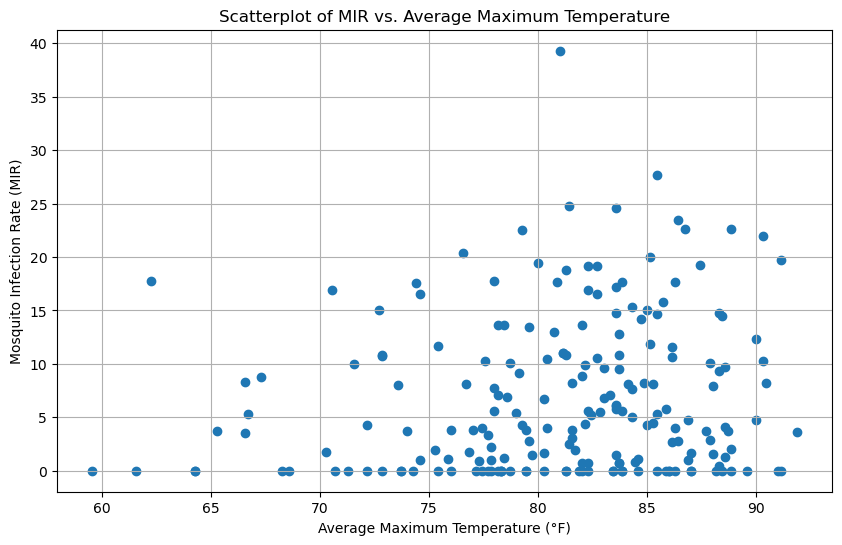

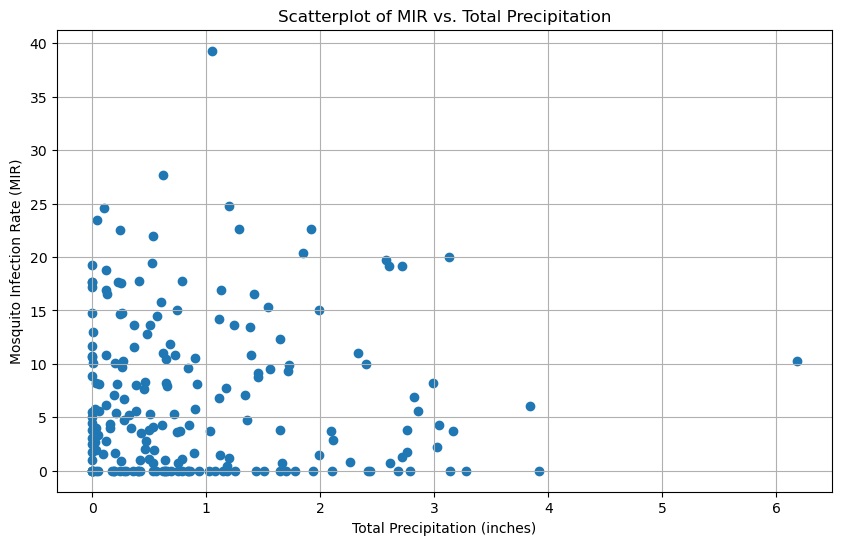

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/processed_data/wnv_wx_merged.csv')

# Scatterplot for MIR vs. Avg_TMAX
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_TMAX'], df['MIR'])
plt.title('Scatterplot of MIR vs. Average Maximum Temperature')
plt.xlabel('Average Maximum Temperature (°F)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.grid(True)
plt.show()

# Scatterplot for MIR vs. Total_PRCP
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_PRCP'], df['MIR'])
plt.title('Scatterplot of MIR vs. Total Precipitation')
plt.xlabel('Total Precipitation (inches)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.grid(True)
plt.show()


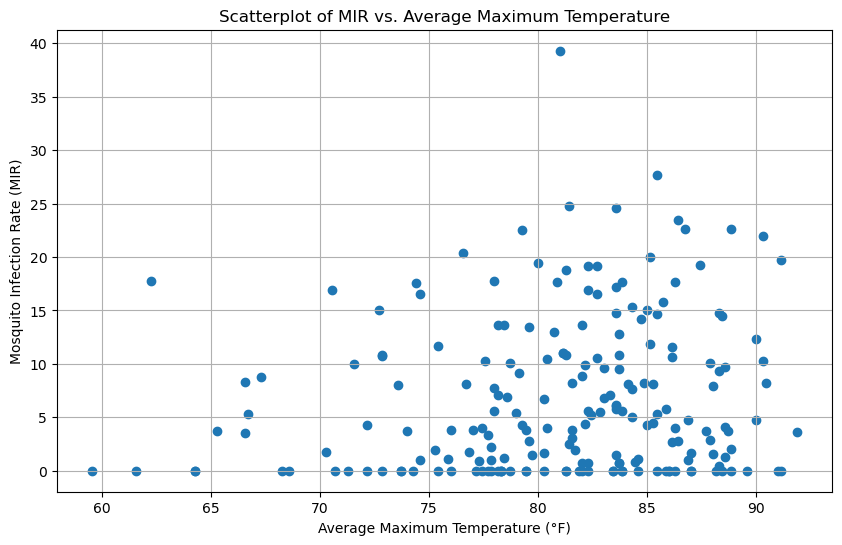

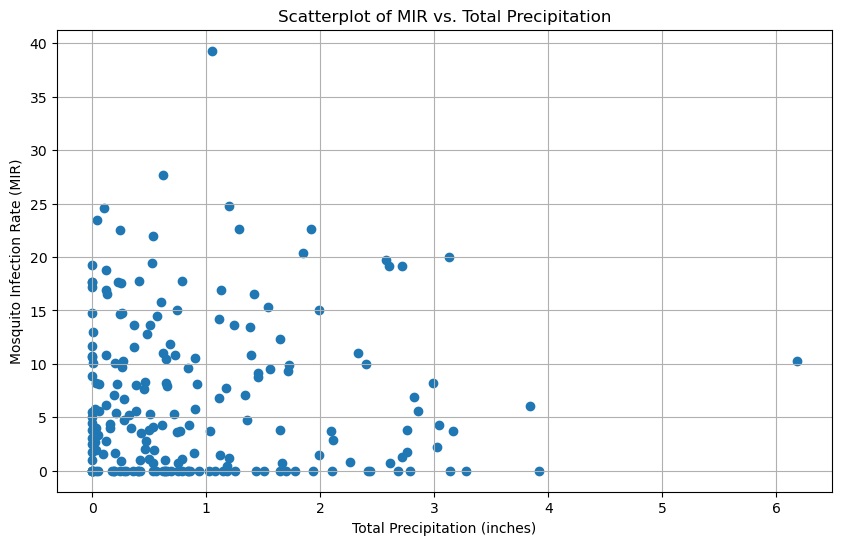

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/processed_data/wnv_wx_merged.csv')

# Scatterplot for MIR vs. Avg_TMAX
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_TMAX'], df['MIR'])
plt.title('Scatterplot of MIR vs. Average Maximum Temperature')
plt.xlabel('Average Maximum Temperature (°F)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.grid(True)
plt.show()

# Scatterplot for MIR vs. Total_PRCP
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_PRCP'], df['MIR'])
plt.title('Scatterplot of MIR vs. Total Precipitation')
plt.xlabel('Total Precipitation (inches)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.grid(True)
plt.show()


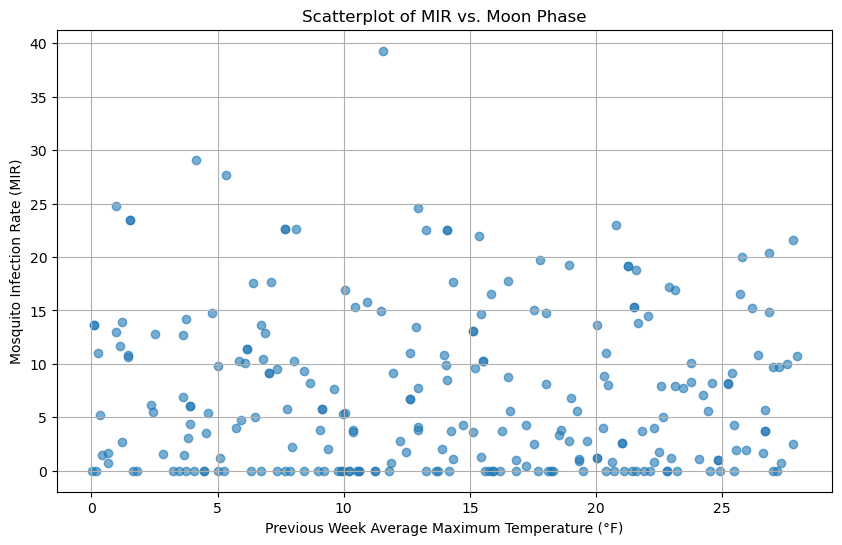

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_moon = pd.read_csv('../data/processed_data/merged_wnv_weather_moon_phases.csv')  # Replace with your actual path


# Scatterplot for MIR vs. Lagged Avg_TMAX
plt.figure(figsize=(10, 6))
plt.scatter(df_moon['moon_phase'], df_moon['MIR'], alpha=0.6)
plt.title('Scatterplot of MIR vs. Moon Phase')
plt.xlabel('Previous Week Average Maximum Temperature (°F)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.grid(True)
plt.show()



In [55]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load the dataset
df = pd.read_csv('../data//processed_data/wnv_wx_merged.csv')  # Adjust the file path as needed

# Ensure that the MIR is numeric and drop NaN values
df['MIR'] = pd.to_numeric(df['MIR'], errors='coerce')
df = df.dropna()

# The ARIMA model is applied to a time series, so you should ensure that your time series is sorted and has a consistent frequency if possible
# Since we're working with weekly data, we'll assume it's already in the correct order

# Here you need to provide the order (p,d,q) for the ARIMA model, which you can determine experimentally
# For the purpose of this example, let's assume p=1, d=1, q=1, which applies one level of differencing and a simple ARMA(1,1) model
model = ARIMA(df['MIR'], order=(1,1,1))

# Fit the ARIMA model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    MIR   No. Observations:                  201
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -601.878
Date:                Thu, 21 Mar 2024   AIC                           1209.757
Time:                        09:04:53   BIC                           1219.652
Sample:                             0   HQIC                          1213.761
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0007      1.189     -0.001      1.000      -2.331       2.330
ma.L1         -0.0570      1.193     -0.048      0.962      -2.396       2.282
sigma2        24.0666      1.817     13.248      0.0

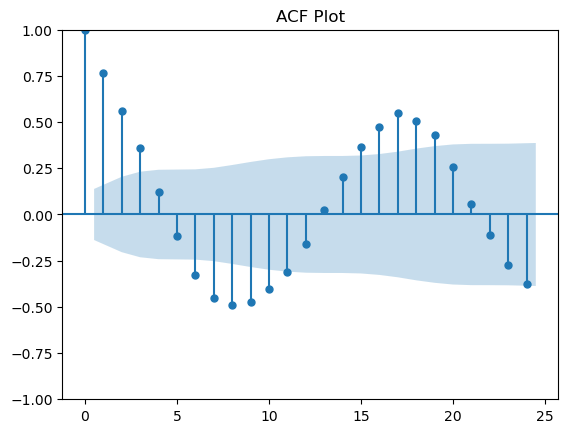

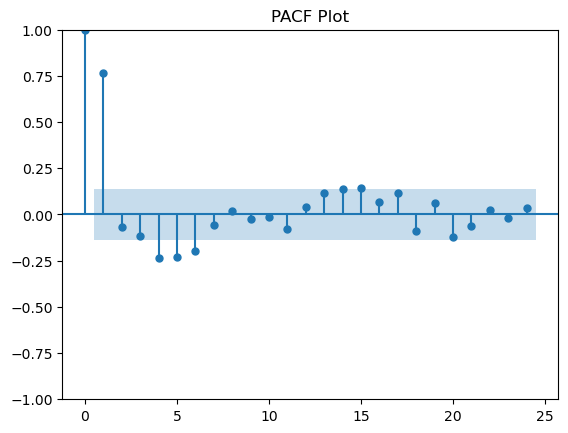

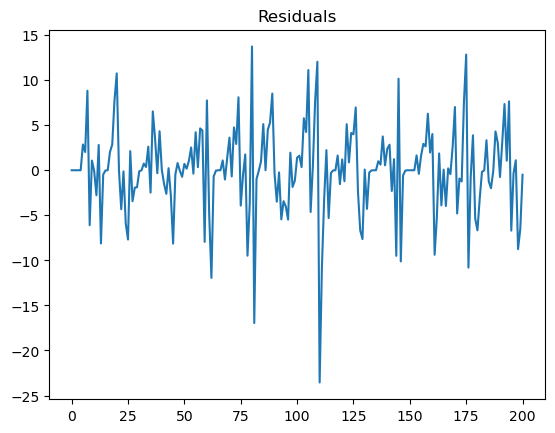

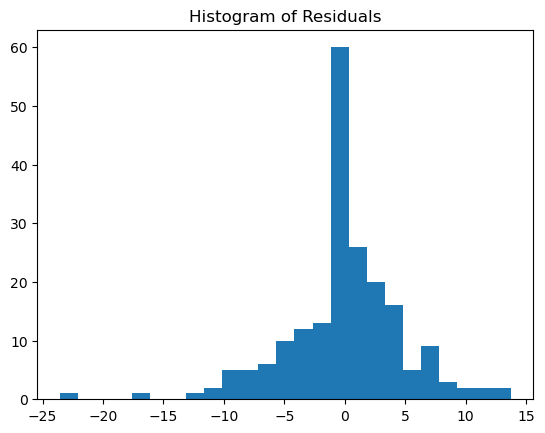

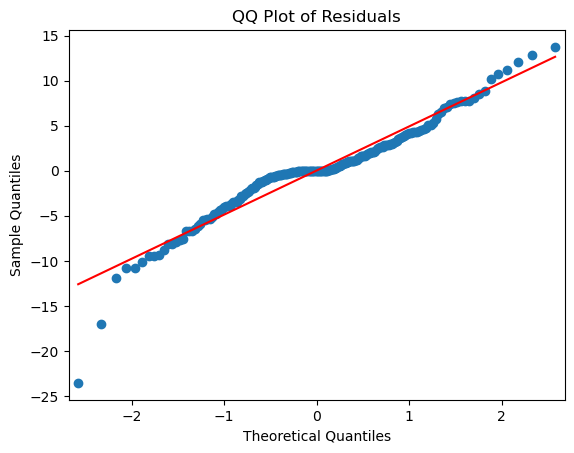

      lb_stat  lb_pvalue
10  28.511907   0.001494


In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the time series column you're analyzing

# Plot ACF and PACF for model selection
plot_acf(df['MIR'])
plt.title('ACF Plot')
plt.show()

plot_pacf(df['MIR'])
plt.title('PACF Plot')
plt.show()

# Fit an ARIMA model
model = ARIMA(df['MIR'], order=(1,1,1))
model_fit = model.fit()

# Plot residuals
residuals = model_fit.resid
plt.figure()
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Histogram of residuals
plt.figure()
plt.hist(residuals, bins=25)
plt.title('Histogram of Residuals')
plt.show()

# QQ plot of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Optionally, conduct a Ljung-Box test and print the results
ljung_box_result = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)


## In the generalized linear model the only predictor that is significantly significant is the average maximum temp the week before the mosquito was tested.

In [58]:
import statsmodels.api as sm
import pandas as pd

df_lag = pd.read_csv('../data//processed_data/wnv_wx_merged.csv')

# Create lagged variables
df_lag['Lagged_Avg_TMAX'] = df_lag['Avg_TMAX'].shift(1)
df_lag['Lagged_Total_PRCP'] = df_lag['Total_PRCP'].shift(1)

# Drop the first row to avoid NaN values in lagged columns
df_lag = df_lag.dropna().reset_index(drop=True)

# Add a time index
df_lag['Time_Index'] = df_lag.index

# Prepare the independent variables (predictors) and the dependent variable
X = df_lag[['Lagged_Avg_TMAX', 'Lagged_Total_PRCP', 'Time_Index']]
y = df_lag['MIR']

# Add a constant to the predictors
X = sm.add_constant(X)

# Create and fit the GLM model with a Poisson family and a log link function
model = sm.GLM(y, X, family=sm.families.Poisson(link=sm.genmod.families.links.log()))
result = model.fit()

# Print the summary of the GLM model
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    MIR   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -990.00
Date:                Thu, 21 Mar 2024   Deviance:                       1415.5
Time:                        09:08:26   Pearson chi2:                 1.36e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5154
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6703      0.42

/Users/andrewruiz/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data_path = '../data/processed_data/merged_wnv_weather_moon_phases.csv'
df = pd.read_csv(data_path)

# Prepare the independent (predictor) and dependent (outcome) variables
X = df[['moon_phase']]  # Predictor
y = df['MIR']  # Outcome

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Corrected: Fit a GLM model with a log link function and Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson(link=sm.genmod.families.links.Log()))

result = model.fit()

# Print the summary of the GLM model
print(result.summary())



In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Load the dataset
data_path = '../data/processed_data/merged_wnv_weather_moon_phases.csv'
df = pd.read_csv(data_path)

# Specify the model formula
formula = 'MIR ~ moon_phase'

# Fit a Negative Binomial model
model_nb = glm(formula, data=df, family=sm.families.NegativeBinomial()).fit()

# Print the summary of the Negative Binomial model
print(model_nb.summary())


In [ ]:
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'], format='%Y-%m-%d')


In [ ]:
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
wnv_mir_daily_with_moon_phases['TEST DATE'] = pd.to_datetime(wnv_mir_daily_with_moon_phases['TEST DATE'])
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'])


In [ ]:
import pandas as pd

# Load the datasets
wnv_mir_daily_with_moon_phases = pd.read_csv('../data/processed_data/wnv_mir_daily_with_moon_phases.csv')
ord_weather = pd.read_csv('../data/raw_data/ORD_weather.csv')

# Convert 'TEST DATE' and 'DATE' to datetime without specifying infer_datetime_format
wnv_mir_daily_with_moon_phases['TEST DATE'] = pd.to_datetime(wnv_mir_daily_with_moon_phases['TEST DATE'])
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'])

# Merge the datasets on the date columns
merged_data = pd.merge(wnv_mir_daily_with_moon_phases, ord_weather, left_on='TEST DATE', right_on='DATE')

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('../data/processed_data/merged_wnv_weather_moon_phases.csv', index=False)


In [ ]:
import pandas as pd

# Load the datasets
wnv_mir_daily_with_moon_phases = pd.read_csv('../data/processed_data/wnv_mir_daily_with_moon_phases.csv')
ord_weather = pd.read_csv('../data/raw_data/ORD_weather.csv')

# Convert 'TEST DATE' to datetime64[ns] to ensure consistent datatype
wnv_mir_daily_with_moon_phases['TEST DATE'] = pd.to_datetime(wnv_mir_daily_with_moon_phases['TEST DATE'])

# Ensure 'DATE' is also datetime64[ns]
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'])

# Confirming data types are consistent for 'TEST DATE' and 'DATE'
print(wnv_mir_daily_with_moon_phases['TEST DATE'].dtype)
print(ord_weather['DATE'].dtype)

# Proceed with the merge operation
merged_data = pd.merge(wnv_mir_daily_with_moon_phases, ord_weather, left_on='TEST DATE', right_on='DATE', how='inner')

# Check if the merge was successful and if the merged dataset isn't empty
if not merged_data.empty:
    print("Merge successful. Number of rows in merged dataset:", len(merged_data))
    # Save the merged DataFrame to a new CSV file
    merged_data.to_csv('../data/processed_data/merged_wnv_weather_moon_phases.csv', index=False)
else:
    print("The merged DataFrame is empty. Check the datasets for overlapping date ranges.")


In [ ]:
# Convert 'TEST DATE' to datetime64[ns] without infer_datetime_format
wnv_mir_daily_with_moon_phases['TEST DATE'] = pd.to_datetime(wnv_mir_daily_with_moon_phases['TEST DATE'])

# Ensure 'DATE' is also datetime64[ns]
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'])


In [ ]:
# Normalize 'TEST DATE' and 'DATE' to date-only format to eliminate time component discrepancies
wnv_mir_daily_with_moon_phases['TEST DATE'] = wnv_mir_daily_with_moon_phases['TEST DATE'].dt.normalize()
ord_weather['DATE'] = ord_weather['DATE'].dt.normalize()

# Proceed with the merge operation
merged_data = pd.merge(wnv_mir_daily_with_moon_phases, ord_weather, left_on='TEST DATE', right_on='DATE', how='inner')

# Check the merged dataset
if not merged_data.empty:
    print("Merge successful. Number of rows in merged dataset:", len(merged_data))
    merged_data.to_csv('../data/processed_data/merged_wnv_weather_moon_phases.csv', index=False)
else:
    print("The merged DataFrame is empty. Check the datasets for overlapping date ranges.")
print(merged_data.head())
merged_data.to_excel('../data/processed_data/merged_wnv_weather_moon_phases.xlsx', index=False)



In [ ]:
print("WNV Test Date Range:", wnv_mir_daily_with_moon_phases['TEST DATE'].min(), "-", wnv_mir_daily_with_moon_phases['TEST DATE'].max())
print("Weather Date Range:", ord_weather['DATE'].min(), "-", ord_weather['DATE'].max())


In [ ]:
import pandas as pd

# Load the datasets
wnv_mir_daily_with_moon_phases = pd.read_csv('../data/processed_data/wnv_mir_daily_with_moon_phases.csv')
ord_weather = pd.read_csv('../data/raw_data/ORD_weather.csv')

# Convert 'TEST DATE' and 'DATE' to datetime to ensure they match exactly
wnv_mir_daily_with_moon_phases['TEST DATE'] = pd.to_datetime(wnv_mir_daily_with_moon_phases['TEST DATE'])
ord_weather['DATE'] = pd.to_datetime(ord_weather['DATE'])

# Merge the datasets on the date columns
merged_data = pd.merge(wnv_mir_daily_with_moon_phases, ord_weather, left_on='TEST DATE', right_on='DATE')

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('../data/processed_data/merged_wnv_weather_moon_phases.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate predicted MIR from the model
df_lag['Predicted_MIR'] = result.predict(X)

# Plot actual vs. predicted MIR for Lagged_Avg_TMAX
plt.figure(figsize=(10, 6))
plt.scatter(df_lag['Lagged_Avg_TMAX'], df_lag['MIR'], color='blue', label='Actual MIR', alpha=0.5)
plt.scatter(df_lag['Lagged_Avg_TMAX'], df_lag['Predicted_MIR'], color='red', label='Predicted MIR', alpha=0.5)
plt.xlabel('Lagged Average Temperature (°F)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.title('Actual vs. Predicted MIR by Lagged Average Temperature')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_lag['Lagged_Total_PRCP'], df_lag['MIR'], color='blue', label='Actual MIR', alpha=0.5)
plt.scatter(df_lag['Lagged_Total_PRCP'], df_lag['Predicted_MIR'], color='red', label='Predicted MIR', alpha=0.5)
plt.xlabel('Lagged Total Precipitation (inches)')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.title('Actual vs. Predicted MIR by Lagged Total Precipitation')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lag['Time_Index'], df_lag['MIR'], label='Actual MIR', color='blue', alpha=0.5)
plt.plot(df_lag['Time_Index'], df_lag['Predicted_MIR'], label='Predicted MIR', color='red', alpha=0.5)
plt.xlabel('Time Index')
plt.ylabel('Mosquito Infection Rate (MIR)')
plt.title('Time Trend of Actual vs. Predicted MIR')
plt.legend()
plt.show()


## now I want to create a binary variable where 1 is when MIR >0 and 0 is MIR = 0. This will show whether there was at least one positive pool in a Year_Week

In [ ]:
import pandas as pd

# Load the dataset
df_bin = pd.read_csv('../data/processed_data/wnv_wx_merged.csv')

# Create the binary variable
df_bin['MIR_Binary'] = (df_bin['MIR'] > 0).astype(int)

# Save the updated DataFrame back to CSV
df_bin.to_csv('../data/processed_data/wnv_wx_merged_with_binary.csv', index=False)
print(df_bin)


## Checking for zero inflation

In [ ]:
import numpy as np

# Assuming 'MIR_Binary' is your binary outcome variable
zero_count = (df_bin['MIR_Binary'] == 0).sum()
total_count = len(df_bin['MIR_Binary'])
proportion_zeros = zero_count / total_count

print(f"Proportion of zeros: {proportion_zeros:.2f}")

# Fit a Poisson model and compare expected proportion of zeros
lambda_hat = df_bin['MIR_Binary'].mean()
expected_zeros = np.exp(-lambda_hat)
print(f"Expected proportion of zeros (Poisson): {expected_zeros:.2f}")


In [ ]:
import pandas as pd

# Load the original dataset into a new DataFrame
df_original = pd.read_csv('../data/processed_data/wnv_wx_merged.csv')

# Create a new DataFrame for modifications to ensure we don't overwrite the original
df_modified = df_original.copy()

# Create lagged weather columns for the previous week's data in df_modified
df_modified['Lagged_Avg_TMAX'] = df_modified['Avg_TMAX'].shift(1)
df_modified['Lagged_Total_PRCP'] = df_modified['Total_PRCP'].shift(1)

# Reset index and create a Time_Index based on the row index in df_modified
df_modified = df_modified.reset_index(drop=True)
df_modified['Time_Index'] = df_modified.index

# Create the binary MIR variable in df_modified
df_modified['MIR_Binary'] = (df_modified['MIR'] > 0).astype(int)

# Save the df_modified DataFrame to a new CSV file to ensure no overwriting
df_modified.to_csv('../data/processed_data/wnv_wx_modified_with_lags_and_binary.csv', index=False)


In [ ]:
# Drop rows with NaN values in the DataFrame
df_modified = df_modified.dropna()

# Prepare the independent variables (predictors) and the dependent variable again
X = df_modified[['Lagged_Avg_TMAX']]
y = df_modified['MIR_Binary']

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Create and fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print out the model results
print(model.summary())



In [ ]:
# Drop rows with NaN values in the DataFrame
df_modified = df_modified.dropna()

# Prepare the independent variables (predictors) and the dependent variable again
X = df_modified[['Lagged_Total_PRCP']]
y = df_modified['MIR_Binary']

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Create and fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print out the model results
print(model.summary())



In [ ]:
pip install suncalc

In [ ]:
import pandas as pd
from astral import moon
from datetime import datetime

# Load dates from CSV
df_moon = pd.read_csv('../data/processed_data/wnv_mir_daily_unique.csv')

# Ensure TEST DATE is in datetime format
df_moon['TEST DATE'] = pd.to_datetime(df_moon['TEST DATE'])

# Define a function to get moon phase using astral
def get_moon_phase(date):
    # Use the moon.phase method from astral, passing the date
    phase = moon.phase(date)
    return phase

# Apply the function to each date in the DataFrame
df_moon['moon_phase'] = df_moon['TEST DATE'].apply(get_moon_phase)

# Save the updated DataFrame back to CSV
df_moon.to_csv('../data/processed_data/wnv_mir_daily_with_moon_phases.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset into a uniquely named DataFrame
df_wnv_daily = pd.read_csv('../data/processed_data/wnv_cleaned.csv')

# Convert TEST DATE to datetime in the uniquely named DataFrame
df_wnv_daily['TEST DATE'] = pd.to_datetime(df_wnv_daily['TEST DATE'])

# Create a column to indicate positive results in the uniquely named DataFrame
df_wnv_daily['positive'] = (df_wnv_daily['RESULT'] == 'positive').astype(int)

# Group by 'TEST DATE' and calculate the necessary sums for MIR calculation in a new DataFrame
daily_mir_summaries = df_wnv_daily.groupby('TEST DATE').agg(
    Positive_Pools=('positive', 'sum'),
    Total_Mosquitoes=('NUMBER OF MOSQUITOES', 'sum')
).reset_index()

# Calculate MIR in the new DataFrame
daily_mir_summaries['MIR'] = (daily_mir_summaries['Positive_Pools'] / daily_mir_summaries['Total_Mosquitoes'])*1000

# Ensure there's no division by zero in the new DataFrame
daily_mir_summaries['MIR'] = daily_mir_summaries['MIR'].fillna(0)

# Save the resulting DataFrame with a unique name
daily_mir_summaries.to_csv('../data/processed_data/wnv_mir_daily_unique.csv', index=False)
